In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
covid_df = pd.read_csv('covid_19_india.csv')
vaccine_df=pd.read_csv('covid_vaccine_statewise.csv/covid_vaccine_statewise.csv')

In [3]:
 vaccine_df.set_index('Updated On').head()

,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
Updated On,,,,,,,,,,,,,,,,,,,,,
16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [4]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [7]:
drop_col = ['Sno','ConfirmedIndianNational','ConfirmedForeignNational']

In [8]:
covid_df.drop(drop_col,axis=1,inplace=True)

In [9]:
covid_df.sample(5)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
840,2020-04-11,5:00 PM,Goa,1,0,7
166,2020-03-16,6:00 PM,Kerala,3,0,23
9290,2020-12-09,8:00 AM,West Bengal,475425,8820,507995
13941,2021-04-18,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,3823,4,4748
13315,2021-03-31,8:00 AM,Sikkim,6050,135,6233


In [10]:
covid_df['Date']=pd.to_datetime(covid_df['Date'],format = '%Y-%m-%d')

In [11]:
covid_df['Active_cases']=covid_df.Confirmed-(covid_df.Cured+covid_df.Deaths)

In [12]:
covid_df.head(10)

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3
5,2020-02-04,6:00 PM,Kerala,0,0,3,3
6,2020-02-05,6:00 PM,Kerala,0,0,3,3
7,2020-02-06,6:00 PM,Kerala,0,0,3,3
8,2020-02-07,6:00 PM,Kerala,0,0,3,3
9,2020-02-08,6:00 PM,Kerala,0,0,3,3


In [13]:
statewise= pd.pivot_table(covid_df,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc=max)

In [14]:
statewise['recovery rate'] = statewise.Cured*100/statewise.Confirmed

In [15]:
statewise['mortality rate']=statewise.Deaths*100/statewise.Confirmed

In [16]:
statewise= statewise.sort_values('Confirmed',ascending = False)

In [17]:
statewise.style.background_gradient(cmap = 'cubehelix')

,Confirmed,Cured,Deaths,recovery rate,mortality rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


### Top 10 Active cases states

In [18]:
top_10_active_cases = covid_df.groupby('State/UnionTerritory').max()[['Active_cases','Date']].sort_values('Active_cases',ascending=False).reset_index()

In [19]:
# top_10_active_cases.drop([15],axis=0)

In [20]:
top_10_states=top_10_active_cases.head(10)

In [21]:
top_10_states

,State/UnionTerritory,Active_cases,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


In [22]:
fig = plt.figure(figsize=(12,6),dpi=100)

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Active Cases')

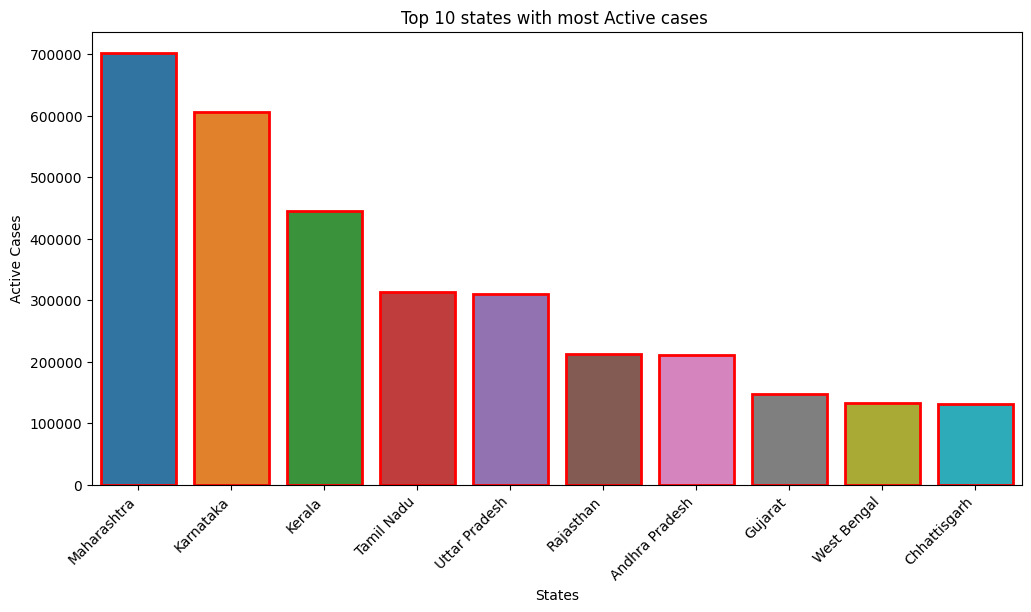

In [23]:
fig = plt.figure(figsize=(12,6),dpi=100)
plt.title('Top 10 states with most Active cases ')
plt.xticks(rotation=45,ha='right')
sns.barplot(data = top_10_states,y='Active_cases',x='State/UnionTerritory',linewidth=2 ,edgecolor = 'red')
plt.xlabel('States')
plt.ylabel('Active Cases')

### Top 10 states with highest deaths reported.

In [24]:
top_10_deaths = covid_df.groupby('State/UnionTerritory').max()[['Deaths','Date']].sort_values('Deaths',ascending=False).reset_index()

In [25]:
top_10_highest_deaths=top_10_deaths.head(12)

In [26]:
top_10_highest_deaths

,State/UnionTerritory,Deaths,Date
0,Maharashtra,134201,2021-08-11
1,Maharashtra***,130753,2021-07-21
2,Karnataka,36848,2021-08-11
3,Karanataka,36197,2021-07-20
4,Tamil Nadu,34367,2021-08-11
5,Delhi,25068,2021-08-11
6,Uttar Pradesh,22775,2021-08-11
7,West Bengal,18252,2021-08-11
8,Kerala,18004,2021-08-11
9,Punjab,16322,2021-08-11


In [27]:
top_10_highest_deaths.drop([1,3],axis=0,inplace=True)

C:\Users\Mohit Bhilwara\AppData\Local\Temp\ipykernel_2124\1826983477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_highest_deaths.drop([1,3],axis=0,inplace=True)


In [28]:
top_10_highest_deaths

,State/UnionTerritory,Deaths,Date
0,Maharashtra,134201,2021-08-11
2,Karnataka,36848,2021-08-11
4,Tamil Nadu,34367,2021-08-11
5,Delhi,25068,2021-08-11
6,Uttar Pradesh,22775,2021-08-11
7,West Bengal,18252,2021-08-11
8,Kerala,18004,2021-08-11
9,Punjab,16322,2021-08-11
10,Andhra Pradesh,13564,2021-08-11
11,Chhattisgarh,13544,2021-08-11


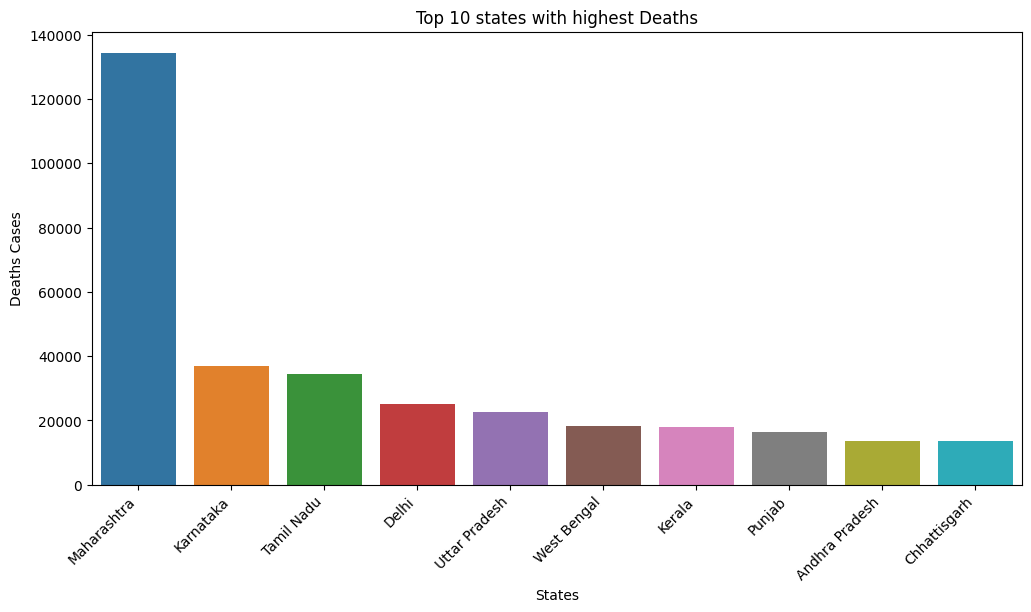

In [29]:
fig = plt.figure(figsize=(12,6),dpi=100)
plt.title('Top 10 states with highest Deaths')
plt.xticks(rotation =45 ,ha ='right')
sns.barplot(data=top_10_highest_deaths ,x='State/UnionTerritory',y='Deaths')
plt.xlabel('States')
plt.ylabel('Deaths Cases');

### Growth Trend

In [30]:
states = ['Maharashtra','Kerala','Karnataka','Uttar Pradesh','Tamil Nadu']

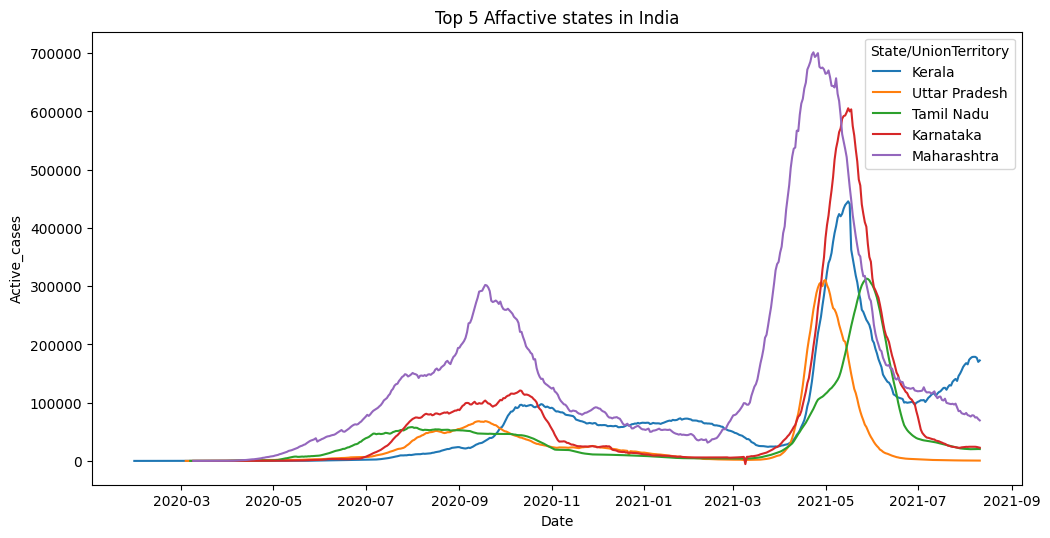

In [31]:
fig = plt.figure(figsize=(12,6),dpi=100)
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(states)]
             ,x='Date',y='Active_cases',hue = 'State/UnionTerritory')
plt.title('Top 5 Affactive states in India',fontsize = 12);

In [32]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [33]:
vaccine_df.rename(columns={'Updated On':'Vaccine_date'},inplace=True)

In [34]:
vaccine_df.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [35]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [36]:
vaccination = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'], axis=1)

In [37]:
vaccination.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [38]:
vaccination['Vaccine_date'] = pd.to_datetime(vaccination['Vaccine_date'], format ='%d/%m/%Y')

In [39]:
vaccination.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


# Male vs Female vaccination

In [40]:
male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()

In [41]:
val = [male,female]
cat = ['Male','Female']

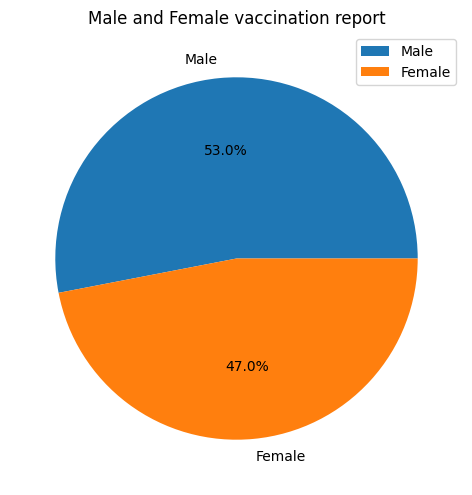

In [42]:
plt.figure(figsize=(12,6),dpi = 100)
plt.title('Male and Female vaccination report')
plt.pie(val,labels = cat,autopct='%1.1f%%')
plt.legend(cat)


# Remove rows where state is india.

In [43]:
vaccine_df.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [44]:
vaccine = vaccine_df[vaccine_df.State!='India']

In [45]:
vaccine.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [46]:
vaccine.rename(columns={'Total Individuals Vaccinated':'Total'},inplace= True)

C:\Users\Mohit Bhilwara\AppData\Local\Temp\ipykernel_2124\181691146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine.rename(columns={'Total Individuals Vaccinated':'Total'},inplace= True)


In [47]:
vaccine.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


# most vaccinated state

In [48]:
max_vaccinated = vaccine.groupby('State')['Total'].sum().to_frame('Total')

In [56]:
max_vaccinated.sort_values('Total')

,Total
State,
Lakshadweep,2.124715e+06
Andaman and Nicobar Islands,8.102125e+06
Ladakh,9.466289e+06
Dadra and Nagar Haveli and Daman and Diu,1.135860e+07
Sikkim,1.613675e+07
Nagaland,1.762450e+07
Puducherry,1.776065e+07
Chandigarh,1.973150e+07
Mizoram,2.057245e+07


In [49]:
max_vacc=max_vaccinated.sort_values('Total',ascending = False).head()

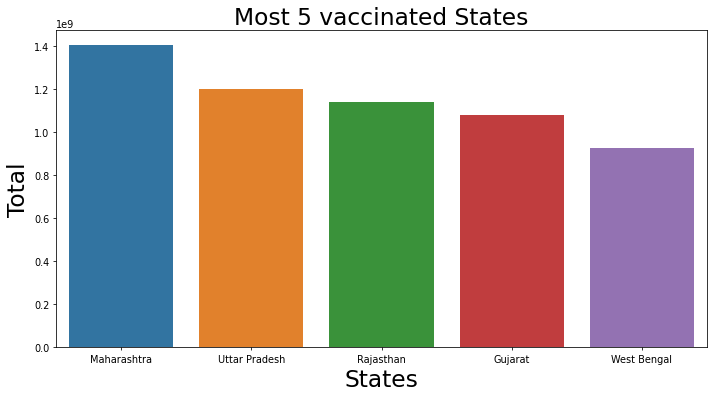

In [50]:
plt.figure(figsize=(12,6),dpi=70)
plt.title('Most 5 vaccinated States',fontsize = 24)
sns.barplot(x=max_vacc.index,y=max_vacc.Total)
plt.xlabel('States',fontsize=24)
plt.ylabel('Total',fontsize=24);

# Least vaccinated State

In [61]:
least_vacc=max_vaccinated.sort_values('Total').head()

In [62]:
least_vacc

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


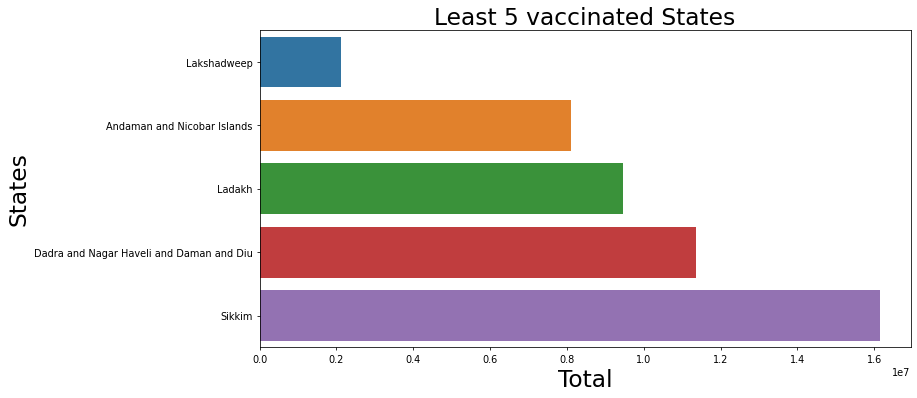

In [66]:
plt.figure(figsize=(12,6),dpi=70)
plt.title('Least 5 vaccinated States',fontsize = 24)
# plt.xticks(rotation = 45,ha = 'right')
sns.barplot(y=least_vacc.index,x=least_vacc.Total)
plt.ylabel('States',fontsize=24)
plt.xlabel('Total',fontsize=24);